# Task 2 : Social media sentiment analysis
### Use a dataset of tweets or Facebook posts and perform sentiment analysis to determine the overall sentiment of the posts.

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [245]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [246]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import download
download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0863a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0863a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [247]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [248]:
from textblob import TextBlob

In [249]:
data= pd.read_csv("C:/Users/0863a/OneDrive/Desktop/Data analyst/data_scientist_task_3sentiment_analysis/Tweets.csv")

In [250]:
data.shape

(14640, 15)

In [251]:
## display.max_columns is used to display all columns present in data
pd.set_option('display.max_columns', None)
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [252]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [253]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [254]:
text_df = data.drop(['airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1)
text_df.head()

,tweet_id,airline_sentiment,airline,text
0,570306133677760513,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [255]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14640 non-null  int64 
 1   airline_sentiment  14640 non-null  object
 2   airline            14640 non-null  object
 3   text               14640 non-null  object
dtypes: int64(1), object(3)
memory usage: 457.6+ KB


In [256]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
text_df.text = text_df['text'].apply(data_processing)

In [257]:
text_df = text_df.drop_duplicates('text')

In [258]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))
text_df.head()

,tweet_id,airline_sentiment,airline,text
0,570306133677760513,neutral,Virgin America,virginamerica dhepburn said
1,570301130888122368,positive,Virgin America,virginamerica plus youve added commercials exp...
2,570301083672813571,neutral,Virgin America,virginamerica didnt today must mean need take ...
3,570301031407624196,negative,Virgin America,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,Virgin America,virginamerica really big bad thing


In [259]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)
text_df.head(10)

,tweet_id,airline_sentiment,airline,text,polarity
0,570306133677760513,neutral,Virgin America,virginamerica dhepburn said,0.000000
1,570301130888122368,positive,Virgin America,virginamerica plus youve added commercials exp...,0.000000
2,570301083672813571,neutral,Virgin America,virginamerica didnt today must mean need take ...,-0.312500
3,570301031407624196,negative,Virgin America,virginamerica really aggressive blast obnoxiou...,0.006250
4,570300817074462722,negative,Virgin America,virginamerica really big bad thing,-0.350000
5,570300767074181121,negative,Virgin America,virginamerica seriously would pay 30 flight se...,-0.516667
6,570300616901320704,positive,Virgin America,virginamerica yes nearly every time fly vx ear...,0.450000
7,570300248553349120,neutral,Virgin America,virginamerica really missed prime opportunity ...,0.200000
8,570299953286942721,positive,Virgin America,virginamerica well didntbut,0.000000
9,570295459631263746,positive,Virgin America,virginamerica amazing arrived hour early youre...,0.466667


<Axes: xlabel='airline_sentiment', ylabel='count'>

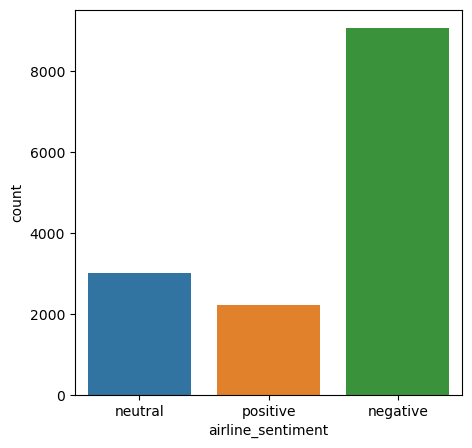

In [260]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='airline_sentiment', data = text_df)

In [261]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [262]:
X = text_df['text']
Y = text_df['airline_sentiment']
X = vect.transform(X)

In [263]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [264]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (11440, 109533)
Size of y_train: (11440,)
Size of x_test: (2860, 109533)
Size of y_test: (2860,)


In [265]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 78.81%
